In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import minmax_scaling

In [ ]:
df = pd.read_csv("/content/data.csv")
miles =  df["km"].to_numpy()
price =  df["price"].to_numpy()
miles = miles.reshape(miles.shape[0], 1)
price = price.reshape(price.shape[0], 1)
plt.scatter(miles,price) 
scaled_price = minmax_scaling(price, columns=[0])
scaled_miles = minmax_scaling(miles, columns=[0])
plt.scatter(scaled_price, scaled_miles)

In [ ]:
scaled_price = minmax_scaling(price, columns=[0])
scaled_miles = minmax_scaling(miles, columns=[0])
plt.scatter(scaled_price, scaled_miles)


In [53]:
theta0 = 0
theta1 = 0
theta = np.array([theta1, theta0]).reshape(2, 1)
X = np.hstack((scaled_miles, np.ones(scaled_miles.shape)))

def model(X, theta):
    return X.dot(theta)

def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

def grad(X, y, theta, learning_rate, n_iterations):
  cost_history = np.zeros(n_iterations)
  m = len(y)
  for i in range(n_iterations):
    theta = theta - learning_rate * 1/m * X.T.dot(model(X, theta) - scaled_price)
    # mise a jour du parametre theta (formule du gradient descent)
    cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i] 
  return theta, cost_history
    

  # return 1/m * X.T.dot(X.dot(theta) - scaled_price)

n_iterations = 1000000
learning_rate = 0.001


theta_final, cost_history = grad(X, scaled_price, theta, learning_rate, n_iterations)
print(theta_final, cost_history)

[[-1.00357574]
 [ 0.93931893]] [0.20543325 0.20507724 0.20472203 ... 0.01034959 0.01034959 0.01034959]


In [54]:
predictions = model(X, theta_final)


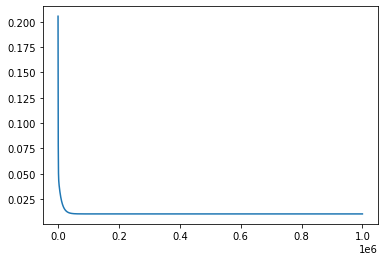

In [55]:
plt.plot(range(n_iterations), cost_history)

In [56]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

coef_determination(scaled_price, predictions)

0.7329747078314965

[[0]
 [0]]


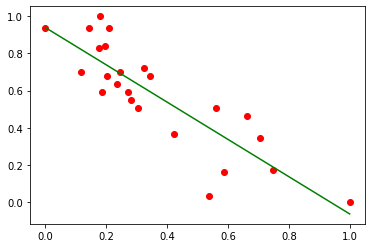

In [57]:
x_ = np.linspace(min(scaled_miles), max(scaled_miles), 100)
y_ = theta_final[0] * x_ + theta_final[1]
print(theta)
plt.plot(x_, y_, c='g')
plt.scatter(scaled_miles, scaled_price, c='r')
